In [17]:
import numpy as np
np.random.seed(0)
from sklearn import preprocessing
import statsmodels.api as sm
import pandas as pd
#!pip install plot_metric
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('datasets/wtMF.csv', index_col=None)
df.head()
df

,wt,gender
0,52,M
1,67,M
2,75,M
3,41,M
4,69,M
5,70,M
6,59,M
7,59,M
8,59,M
9,56,M


In [20]:
# encode the dataset
labenc = preprocessing.LabelEncoder()
df[['gender']] = df[['gender']].apply(labenc.fit_transform)
df

,wt,gender
0,52,1
1,67,1
2,75,1
3,41,1
4,69,1
5,70,1
6,59,1
7,59,1
8,59,1
9,56,1


In [21]:
# X is a dataframe, Y is a numpy array
X = df[['wt']]
X = sm.add_constant(X)
y = df.gender

In [6]:
X

,const,wt
0,1.0,52
1,1.0,67
2,1.0,75
3,1.0,41
4,1.0,69
5,1.0,70
6,1.0,59
7,1.0,59
8,1.0,59
9,1.0,56


In [7]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: gender, dtype: int32

In [22]:
# there are many parameters to tune in this
model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.687460
         Iterations 4


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Feb 2022   Pseudo R-squ.:                0.008205
Time:                        09:20:08   Log-Likelihood:                -13.749
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                    0.6334
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8330      3.916     -0.468      0.640      -9.507       5.841
wt             0.0306      0.065      0.471      0.637      -0.097       0.158
==============================================================================
"""

In [10]:
model.predict(X) # probabilities for Y=1

0     0.439490
1     0.553632
2     0.613000
3     0.359041
4     0.568689
5     0.576171
6     0.492695
7     0.492695
8     0.492695
9     0.469802
10    0.485056
11    0.477424
12    0.477424
13    0.500338
14    0.515619
15    0.492695
16    0.485056
17    0.477424
18    0.477424
19    0.553632
dtype: float64

In [11]:
df['prob'] = model.predict(X)
df[df.prob < 0.5]
model.aic

31.49840857156927

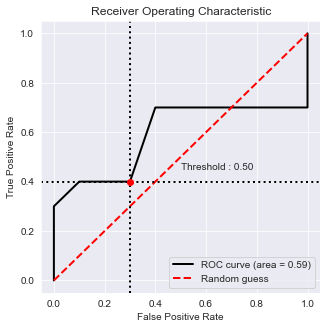

In [12]:
# Visualisation with plot_metric
bc = BinaryClassification(y, model.predict(X), labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [13]:
X = X.drop('wt',axis=1)
X

,const
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [14]:
modelnull = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1


In [15]:
modelnull.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   20
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            0
Date:                Tue, 08 Feb 2022   Pseudo R-squ.:                   0.000
Time:                        08:43:09   Log-Likelihood:                -13.863
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.447          0      1.000      -0.877       0.877
==============================================================================
"""

In [16]:
modelnull.predict(X)

0     0.5
1     0.5
2     0.5
3     0.5
4     0.5
5     0.5
6     0.5
7     0.5
8     0.5
9     0.5
10    0.5
11    0.5
12    0.5
13    0.5
14    0.5
15    0.5
16    0.5
17    0.5
18    0.5
19    0.5
dtype: float64